In [1]:
# Visualisations
import matplotlib.pyplot as plt 
import matplotlib
import plotly
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import make_subplots
init_notebook_mode()

import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data exploration
import pandas as pd

# Numerical
import numpy as np

# Regular expressions
import re



In [10]:
crimes_original = pd.read_csv('../Capstone-Fall-18/data/NYPD_Complaint_Data_Current_YTD.csv')
crimes_original.head()

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0   831526991           67       BROOKLYN   03/31/2018     23:30:00   
1   496736340          120  STATEN ISLAND   03/31/2018     23:20:00   
2   399593692          105         QUEENS   03/31/2018     23:15:00   
3   282376455          110         QUEENS   03/31/2018     23:10:00   
4   201598299           78       BROOKLYN   03/31/2018     23:10:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD         HADEVELOPT  HOUSING_PSA  \
0   03/31/2018     23:37:00        COMPLETED                NaN          NaN   
1   03/31/2018     23:30:00        COMPLETED   RICHMOND TERRACE      10143.0   
2   03/31/2018     23:20:00        COMPLETED                NaN          NaN   
3   03/31/2018     23:20:00        COMPLETED                NaN          NaN   
4   03/31/2018     23:19:00        COMPLETED  572 WARREN STREET       2379.0   

               ...                SUSP_SEX TRANSIT_DISTRICT  VIC_AGE_GROUP  \
0              ...                     NaN              NaN        UNKNOWN   
1              ...                       M              NaN            <18   
2              ...                       M              NaN          18-24   
3              ...                       M              NaN          25-44   
4              ...                       F              NaN          25-44   

         VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0         UNKNOWN       E  1003227.0   177460.0  40.653751 -73.931609   
1           BLACK       F   962748.0   174174.0  40.644726 -74.077483   
2           BLACK       F  1056932.0   200034.0  40.715434 -73.737816   
3  WHITE HISPANIC       M  1014990.0   210503.0  40.744414 -73.889065   
4           BLACK       F   989141.0   187733.0  40.681967 -73.982367   

                         Lat_Lon  
0  (40.653751263, -73.931609227)  
1  (40.644726131, -74.077483159)  
2  (40.715433534, -73.737816163)  
3  (40.744413503, -73.889065158)  
4  (40.681967344, -73.982367054)  

[5 rows x 35 columns]

In [6]:
crimes_original.shape

(6048796, 24)

In [34]:
crimes_original.describe(include = [np.number])

CMPLNT_NUM    ADDR_PCT_CD   HOUSING_PSA  JURISDICTION_CODE  \
count  1.095430e+05  109543.000000   8981.000000      109486.000000   
mean   5.485759e+08      62.203710   6740.281817           0.991953   
std    2.602368e+08      34.478829  14318.362695           8.356367   
min    1.000032e+08       1.000000    218.000000           0.000000   
25%    3.221076e+08      34.000000    477.000000           0.000000   
50%    5.482238e+08      62.000000    696.000000           0.000000   
75%    7.740450e+08      90.000000   1233.000000           0.000000   
max    9.999894e+08     123.000000  66871.000000          97.000000   

               KY_CD          PD_CD  TRANSIT_DISTRICT    X_COORD_CD  \
count  109543.000000  109486.000000       3132.000000  1.095410e+05   
mean      304.255087     412.556939         12.491699  1.004689e+06   
std       153.408398     220.627606         12.194563  2.107122e+04   
min       101.000000     101.000000          1.000000  9.135120e+05   
25%       121.000000     254.000000          3.000000  9.916000e+05   
50%       341.000000     349.000000          4.000000  1.004277e+06   
75%       351.000000     638.000000         23.000000  1.016293e+06   
max       678.000000     922.000000         34.000000  1.067226e+06   

          Y_COORD_CD       Latitude      Longitude  
count  109541.000000  109541.000000  109541.000000  
mean   207892.495011      40.737253     -73.926219  
std     30256.438911       0.083050       0.075994  
min    121674.000000      40.500391     -74.254377  
25%    184994.000000      40.674369     -73.973456  
50%    207297.000000      40.735664     -73.927708  
75%    235507.000000      40.813058     -73.884233  
max    271820.000000      40.912723     -73.700568

In [35]:
crimes_original.describe(include = [np.object])

BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
count     109485       109543       109543        93527        93577   
unique         5          975         1439          609         1439   
top     BROOKLYN   01/26/2018     12:00:00   02/15/2018     12:00:00   
freq       32222         1404         3035         1241         1668   

       CRM_ATPT_CPTD_CD   HADEVELOPT        JURIS_DESC   LAW_CAT_CD  \
count            109543         5822            109543       109543   
unique                2          243                18            3   
top           COMPLETED  CASTLE HILL  N.Y. POLICE DEPT  MISDEMEANOR   
freq             107665          112             95872        60587   

       LOC_OF_OCCUR_DESC              ...               PREM_TYP_DESC  \
count              90151              ...                      109110   
unique                 5              ...                          71   
top               INSIDE              ...                      STREET   
freq               63874              ...                       28167   

            RPT_DT STATION_NAME SUSP_AGE_GROUP SUSP_RACE SUSP_SEX  \
count       109543         3132          81410     81419    81419   
unique          90          328             15         7        3   
top     02/15/2018   125 STREET          25-44     BLACK        M   
freq          1439          131          28390     31209    50902   

       VIC_AGE_GROUP VIC_RACE VIC_SEX                        Lat_Lon  
count         109543   109543  109543                         109541  
unique            13        7       4                          37148  
top            25-44  UNKNOWN       F  (40.750430768, -73.989282176)  
freq           36471    36029   42834                            301  

[4 rows x 24 columns]

In [12]:
crimes_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109543 entries, 0 to 109542
Data columns (total 35 columns):
CMPLNT_NUM           109543 non-null int64
ADDR_PCT_CD          109543 non-null int64
BORO_NM              109485 non-null object
CMPLNT_FR_DT         109543 non-null object
CMPLNT_FR_TM         109543 non-null object
CMPLNT_TO_DT         93527 non-null object
CMPLNT_TO_TM         93577 non-null object
CRM_ATPT_CPTD_CD     109543 non-null object
HADEVELOPT           5822 non-null object
HOUSING_PSA          8981 non-null float64
JURISDICTION_CODE    109486 non-null float64
JURIS_DESC           109543 non-null object
KY_CD                109543 non-null int64
LAW_CAT_CD           109543 non-null object
LOC_OF_OCCUR_DESC    90151 non-null object
OFNS_DESC            109539 non-null object
PARKS_NM             461 non-null object
PATROL_BORO          109486 non-null object
PD_CD                109486 non-null float64
PD_DESC              109486 non-null object
PREM_TYP_DESC      

In [13]:
count = crimes_original.groupby('LAW_CAT_CD').size()
print(count)

LAW_CAT_CD
FELONY         32695
MISDEMEANOR    60587
VIOLATION      16261
dtype: int64


In [59]:
crimes_original.groupby(['PATROL_BORO', 'PREM_TYP_DESC']).size()


PATROL_BORO                PREM_TYP_DESC               
PATROL BORO BKLYN NORTH    ABANDONED BUILDING                 7
                           AIRPORT TERMINAL                   1
                           ATM                               10
                           BANK                              51
                           BAR/NIGHT CLUB                   186
                           BEAUTY & NAIL SALON               61
                           BOOK/CARD                          3
                           BRIDGE                            10
                           BUS (NYC TRANSIT)                 38
                           BUS (OTHER)                       10
                           BUS STOP                           7
                           BUS TERMINAL                       2
                           CANDY STORE                       20
                           CEMETERY                           2
                           CHAIN STORE          

In [70]:
new = crimes_original['PATROL_BORO']


In [68]:
new

0           PATROL BORO BKLYN SOUTH
1         PATROL BORO STATEN ISLAND
2          PATROL BORO QUEENS SOUTH
3          PATROL BORO QUEENS NORTH
4           PATROL BORO BKLYN SOUTH
5           PATROL BORO BKLYN NORTH
6                 PATROL BORO BRONX
7          PATROL BORO QUEENS SOUTH
8         PATROL BORO STATEN ISLAND
9                 PATROL BORO BRONX
10         PATROL BORO QUEENS NORTH
11        PATROL BORO STATEN ISLAND
12                PATROL BORO BRONX
13         PATROL BORO QUEENS SOUTH
14                PATROL BORO BRONX
15         PATROL BORO QUEENS NORTH
16            PATROL BORO MAN NORTH
17            PATROL BORO MAN SOUTH
18          PATROL BORO BKLYN SOUTH
19            PATROL BORO MAN NORTH
20                PATROL BORO BRONX
21          PATROL BORO BKLYN NORTH
22          PATROL BORO BKLYN NORTH
23         PATROL BORO QUEENS NORTH
24            PATROL BORO MAN NORTH
25                PATROL BORO BRONX
26          PATROL BORO BKLYN SOUTH
27          PATROL BORO BKLY

In [14]:
def plot_corr(crimes_original,size =24):
    corr = crimes_original.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.title('Correlation')
    

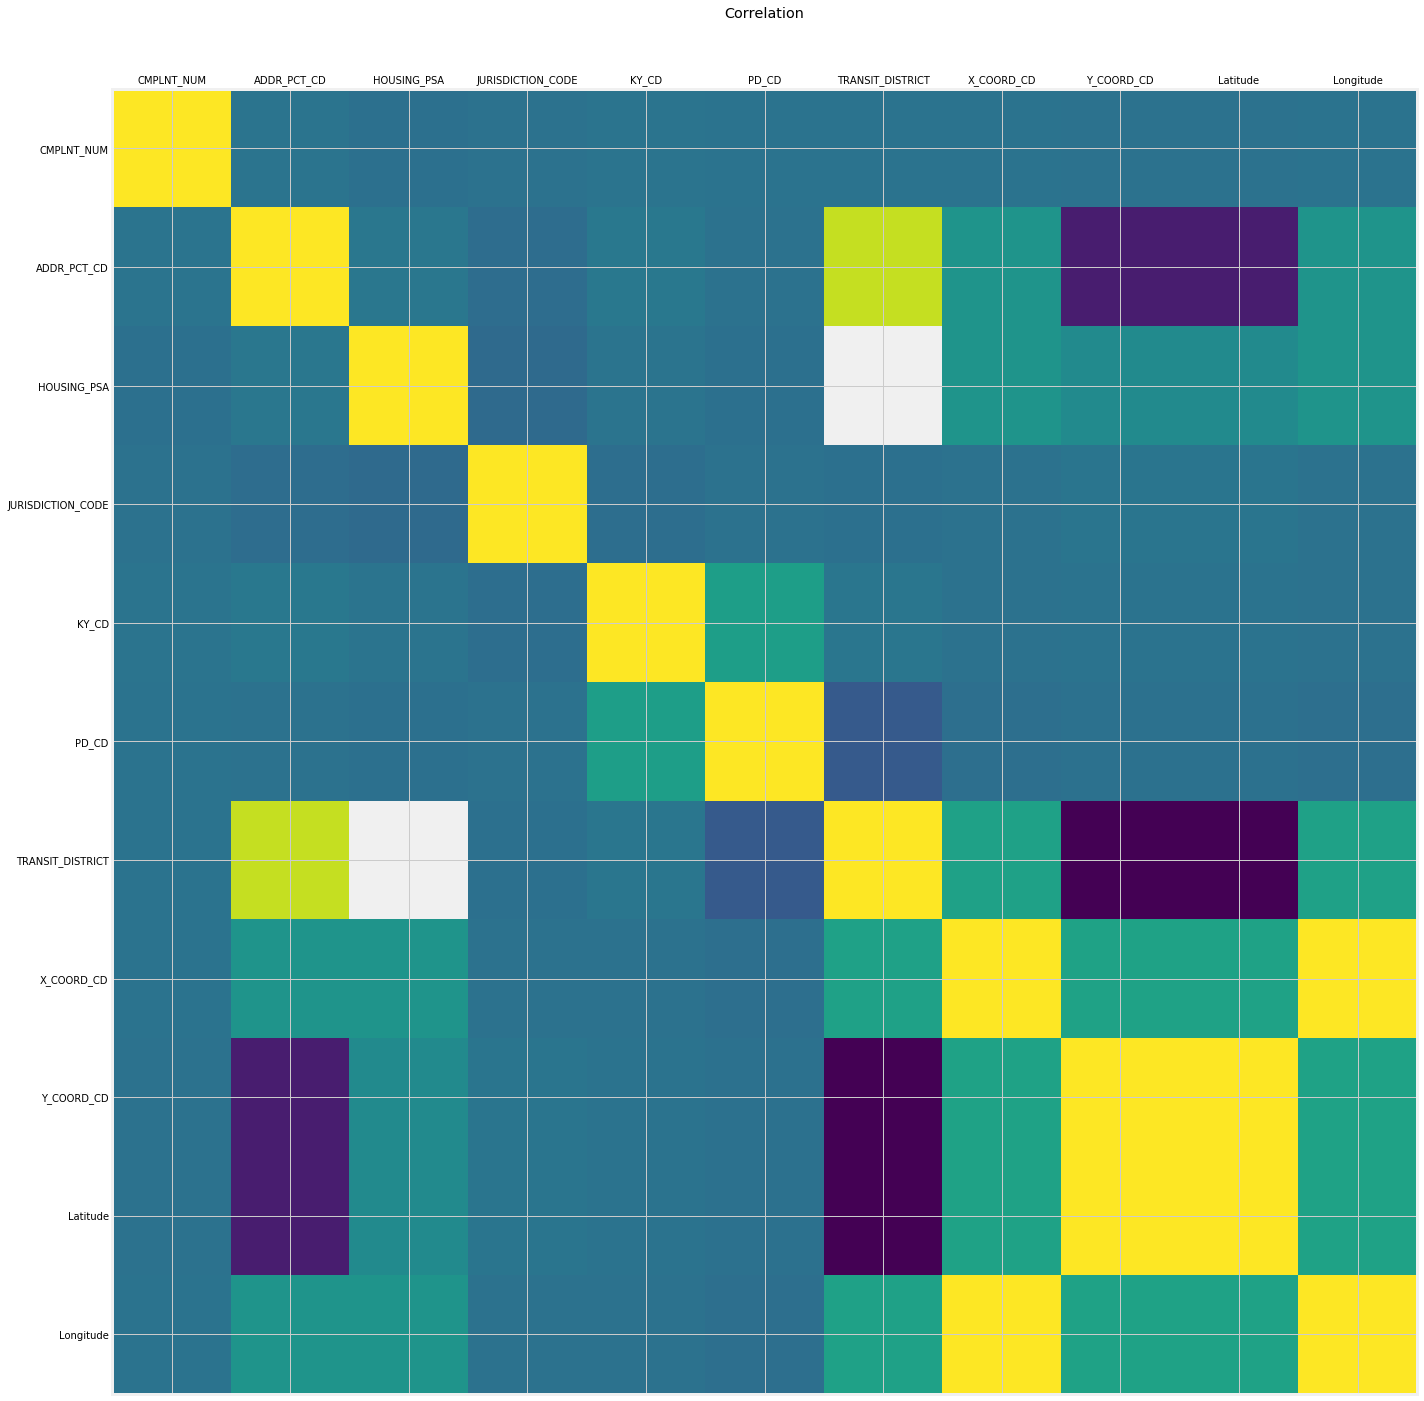

In [15]:
plot_corr(crimes_original)

In [16]:
# Counted
borogroup = crimes_original.BORO_NM.value_counts()
boro = borogroup.index


In [17]:
# Choose colors for plotly plots
import colorlover as cl
from IPython.display import HTML

chosen_colors=cl.scales['9']['seq']['BuPu']
print('The color palette chosen for this notebook is:')
HTML(cl.to_html(chosen_colors))

The color palette chosen for this notebook is:


In [18]:
# Crimes divided into boroughs - plotly
trace1 = go.Bar(
    x = boro,
    y = borogroup,
    name = 'No. of crimes',
    textposition = 'outside',
    marker = dict(color=chosen_colors[6],
                line=dict(
                    color='rgb(48,12,80)',
                    width=2.5,
                )        
    ),
    opacity = 0.65
)

data=[trace1]

layout = go.Layout(
    title = 'No. of crimes in New York Boroughs',
    xaxis = dict( title = 'Borough'),
    yaxis = dict( title = 'Np. of crimes'), width=700, height=500)
   

figure = go.Figure(data=data, layout=layout)
py.iplot(figure)

In [19]:
# Calculate incidents dvided into level of offence
sum_mis = crimes_original.BORO_NM[crimes_original.LAW_CAT_CD == 'MISDEMEANOR'].value_counts()
sum_fel = crimes_original.BORO_NM[crimes_original.LAW_CAT_CD == 'FELONY'].value_counts()
sum_vio = crimes_original.BORO_NM[crimes_original.LAW_CAT_CD == 'VIOLATION'].value_counts()

In [20]:
# Grouped bar chart
trace1 = go.Bar(
    x = boro,
    y = sum_mis,
    name = 'MISDEMEANOR',
    marker = dict(color=chosen_colors[7]),
    opacity = 0.7
)

trace2 = go.Bar(
    x = boro,
    y = sum_fel,
    name = 'FELONY',
    marker = dict(color=chosen_colors[5]),
    opacity = 0.7
)

trace3 = go.Bar(
    x = boro,
    y = sum_vio,
    name = 'VIOLATION',
    marker = dict(color=chosen_colors[3]),
    opacity = 0.7
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'No. of incidents in New York Boroughs divided into levels of offence',
    barmode='group',
    xaxis = dict( title = 'Borough'),
    yaxis = dict( title = 'Np. of crimes'), width=700, height=500
)

figure = go.Figure(data=data, layout=layout)
py.iplot(figure)

In [21]:
crimes_original[['Latitude','Longitude']].describe()

Latitude      Longitude
count  109541.000000  109541.000000
mean       40.737253     -73.926219
std         0.083050       0.075994
min        40.500391     -74.254377
25%        40.674369     -73.973456
50%        40.735664     -73.927708
75%        40.813058     -73.884233
max        40.912723     -73.700568

In [22]:
# Map using mapbox access token and plotly

#mapbox_access_token  # https://www.mapbox.com/

# new variables
crimes_lon = crimes_original.Longitude
crimes_lat = crimes_original.Latitude

data = [
    go.Scattermapbox(
        lat=crimes_lat[:5000], 
        lon=crimes_lon[:5000],
        mode='markers',
        marker=dict(
            size=5,
            color='rgb(26, 40, 31)',
            opacity=0.5
        ),
        text=['New York'],
        hoverinfo='none'
    )
]

layout = go.Layout(
    title="New York Crimes Locations",
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken='pk.eyJ1Ijoid2lsZnk5MjQ5IiwiYSI6ImNqbjdqNHN0NDA3bmcza3M5MTN2Y2dsNWYifQ.lfyB5ISvgxu0N6EZOIjn2w',
        bearing=0,
        center=dict(
            lat=40.729302,
            lon=-73.986670
        ),
        pitch=45,
        zoom=13.18,
        #style='mapbox://styles/mihalw28/cjlz6bzrv697i2rpec2yqartr',# Inspiration and more interesting this type visualisations: https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering
    ),
    #width = 700,
    height = 850
)

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [7]:
crimes_original[['Latitude','Longitude']].describe()

Latitude     Longitude
count  5.842919e+06  5.842919e+06
mean   4.073471e+01 -7.392631e+01
std    8.367338e-02  7.734389e-02
min    4.049806e+01 -7.425508e+01
25%    4.067215e+01 -7.397312e+01
50%    4.073135e+01 -7.392764e+01
75%    4.081219e+01 -7.388423e+01
max    4.091272e+01 -7.370032e+01

In [26]:
location = crimes_original[['Latitude','Longitude']]
location = location.dropna()


In [17]:
location

Latitude  Longitude
0        40.828848 -73.916661
1        40.697338 -73.784557
2        40.802607 -73.945052
3        40.654549 -73.726339
4        40.738002 -73.987891
5        40.665023 -73.957111
6        40.720200 -73.988735
7        40.845707 -73.910398
8        40.856711 -73.891900
9        40.765618 -73.963623
10       40.822040 -73.891732
11       40.732828 -73.986063
12       40.757916 -73.989299
13       40.757916 -73.989299
14       40.644562 -73.927662
15       40.708096 -73.782102
16       40.755197 -73.968296
17       40.857924 -73.891952
18       40.606309 -73.965133
19       40.679499 -73.862825
20       40.655642 -73.959863
22       40.749307 -73.897578
23       40.671237 -73.877222
24       40.660258 -73.913671
25       40.586060 -73.971743
26       40.633033 -74.021193
27       40.669800 -73.892398
28       40.696494 -73.949431
29       40.624475 -74.158203
30       40.838862 -73.910306
...            ...        ...
6048764  40.831394 -73.935716
6048765  40.716761 -74.008749
6048766  40.658928 -73.889820
6048767  40.609081 -73.950765
6048768  40.625238 -73.918879
6048769  40.875384 -73.876043
6048770  40.626858 -74.163443
6048771  40.615745 -73.899206
6048772  40.623227 -74.149227
6048773  40.877554 -73.872939
6048774  40.712419 -73.851024
6048775  40.762273 -73.958568
6048776  40.707763 -74.011706
6048777  40.633319 -73.968041
6048778  40.853998 -73.827597
6048779  40.890963 -73.832944
6048780  40.610198 -73.973260
6048781  40.667367 -73.903381
6048782  40.726738 -73.991602
6048783  40.615460 -73.977943
6048784  40.663630 -73.955529
6048785  40.701646 -73.938012
6048786  40.666627 -73.886888
6048788  40.781825 -73.947319
6048789  40.848123 -73.901467
6048790  40.670895 -73.936491
6048791  40.676447 -73.804136
6048792  40.722142 -73.958701
6048793  40.890075 -73.855834
6048794  40.613704 -73.981593

[5842919 rows x 2 columns]

In [27]:
x = location['Longitude']
y = location['Latitude']

x
y


0         40.653751
1         40.644726
2         40.715434
3         40.744414
4         40.681967
5         40.693161
6         40.869470
7         40.707901
8         40.624611
9         40.833155
10        40.742813
11        40.636819
12        40.805504
13        40.689635
14        40.841921
15        40.771874
16        40.800846
17        40.748510
18        40.619362
19        40.834336
20        40.905458
21        40.656906
22        40.678322
23        40.760737
24        40.799184
25        40.860460
26        40.630515
27        40.643679
28        40.844250
29        40.826111
            ...    
109513    40.747495
109514    40.673935
109515    40.850083
109516    40.658401
109517    40.818414
109518    40.712362
109519    40.674018
109520    40.824941
109521    40.878003
109522    40.813547
109523    40.818574
109524    40.716918
109525    40.811075
109526    40.722262
109527    40.764468
109528    40.655471
109529    40.740627
109530    40.573909
109531    40.711245


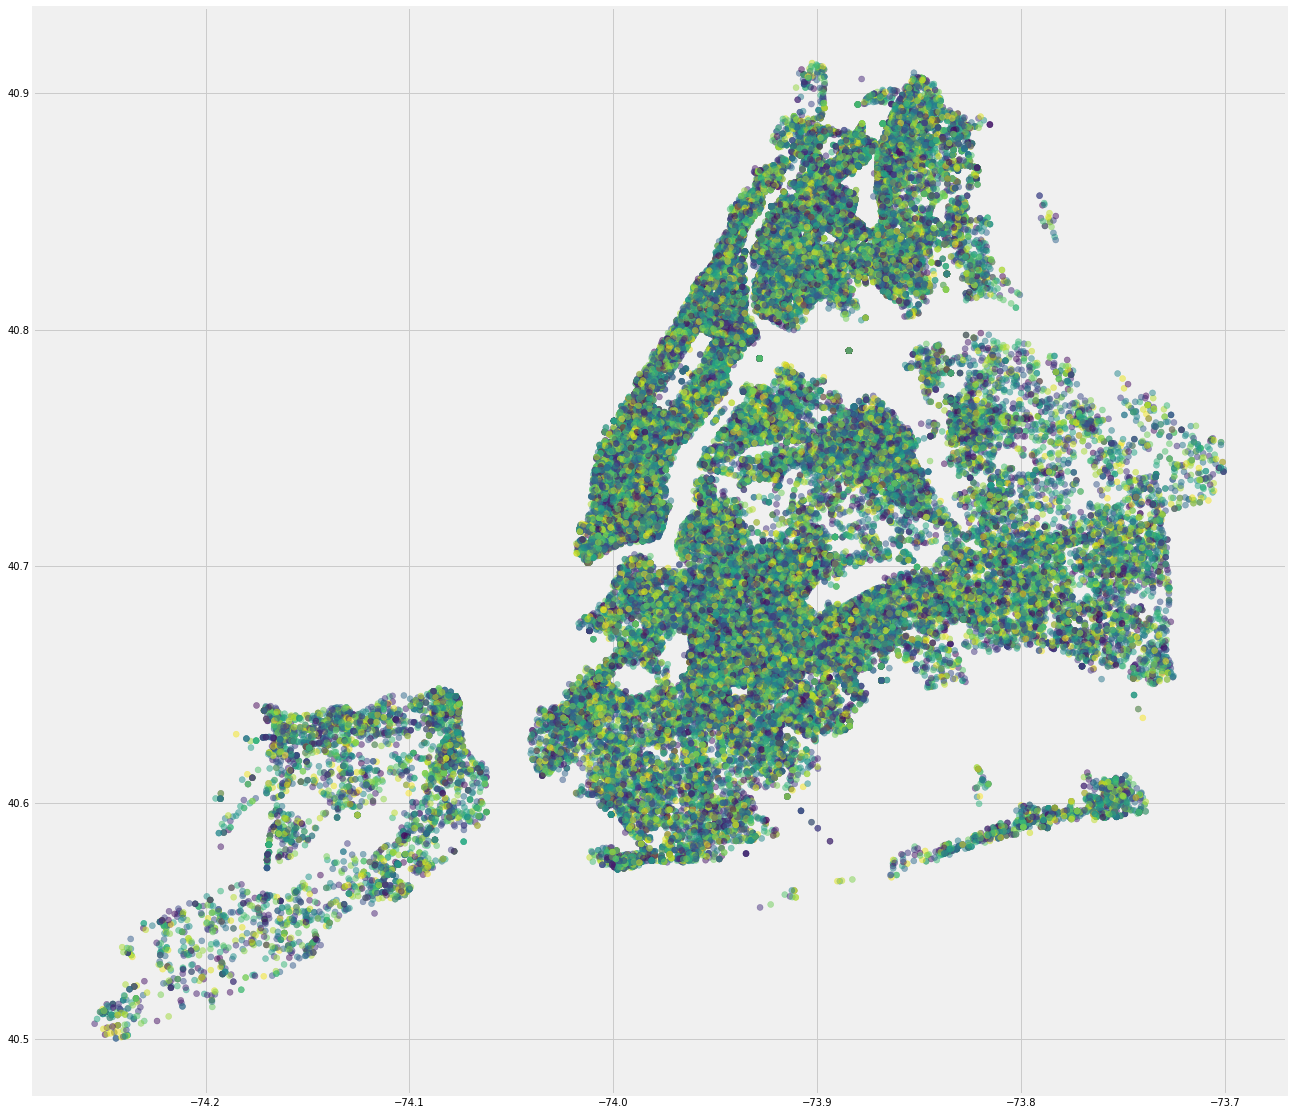

In [28]:
colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [1]:
import plotly
plotly.__version__

'3.3.0'

In [2]:
import plotly.plotly as py
import plotly.figure_factory as ff

fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

In [3]:
fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig, filename='choropleth of some cali counties - full usa scope')

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
pip install geopandas==0.3.0
pip install pyshp==1.2.10
pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
conda install plotly
conda install geopandas
```